Alors que la première section était consacrée à la compréhension des bases de NumPy, celle-ci couvrira des applications plus avancées et complexes.


Genis Skura - Janvier 2025

Comparaisons, Masques et Logique Booléenne

In [1]:
import numpy as np

a = np.random.randint(0, 100, size=10)
print("Tableau :", a)

a_superior = a > 50
print("Éléments supérieurs à 50 :", a_superior)

a_egal = a == 25
print("Éléments égaux à 25 :", a_egal)

Tableau : [47 62 69 92 57 88 61 68 10 76]
Éléments supérieurs à 50 : [False  True  True  True  True  True  True  True False  True]
Éléments égaux à 25 : [False False False False False False False False False False]


Un masque booléen est utilisé pour extraire les valeurs d'un tableau qui respectent une certaine condition.

In [2]:
valeurs_filtrees = a[a_superior]
print("Valeurs filtrées :", valeurs_filtrees)

Valeurs filtrées : [62 69 92 57 88 61 68 76]


**np.where()** -> permet de remplacer les valeurs selon une condition. Si la condition est vraie, une valeur est assignée

In [3]:
tableau_modifie = np.where(a > 50, 100, a)
print("Tableau modifié :", tableau_modifie)

Tableau modifié : [ 47 100 100 100 100 100 100 100  10 100]


Le terme NaN signifie Not a Number, il s'agit des données manquantes, non définies ou invalides.

In [4]:
x = np.array([[1., 2.], [np.nan, 3.], [np.nan, np.nan]])
print("Before: {}".format(x))
nan_mask = np.isnan(x)
x[nan_mask] = 22.0
print("After: {}".format(x))

Before: [[ 1.  2.]
 [nan  3.]
 [nan nan]]
After: [[ 1.  2.]
 [22.  3.]
 [22. 22.]]


Example de modification

In [5]:
arr = np.random.randint(0, 100, size=(3, 4, 5))

#### Masque et opérations
masque = (30 <= arr) & (arr <= 70) & (arr % 5 == 0)
arr[masque] = -11 
moyenne = arr[masque].mean() if masque.any() else None

print("Tableau modifié :\n", arr)
print("Moyenne des valeurs remplacées :", moyenne)

Tableau modifié :
 [[[ 66   0  62  38  99]
  [  8  76  72  83  23]
  [ 26  88  37   1  36]
  [ 63  42  23  61  31]]

 [[  2  57  79  71  95]
  [ 19  56  23 -11   2]
  [ 97  88  86  98  97]
  [ 96  15  19  27 -11]]

 [[  8  74 -11 -11  63]
  [ 82 -11  25  31  59]
  [ 98  15  44  17   2]
  [  0  94  38  52  81]]]
Moyenne des valeurs remplacées : -11.0


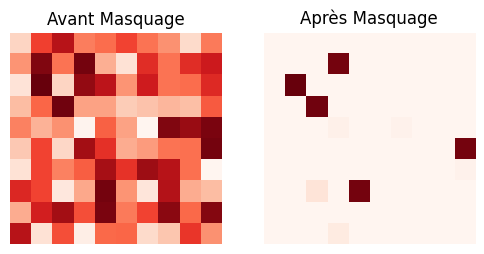

In [35]:
import matplotlib.pyplot as plt

tableau_2d = np.random.randint(0, 100, size=(10, 10))

masque = (10 <= tableau_2d) & (tableau_2d <= 95)
tableau_modifie = tableau_2d.copy()
tableau_modifie[masque] = -1


fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(tableau_2d, cmap='Reds', interpolation='nearest')
axes[0].set_title("Avant Masquage")
axes[0].axis('off')
axes[1].imshow(tableau_modifie, cmap='Reds', interpolation='nearest')
axes[1].set_title("Après Masquage")
axes[1].axis('off')
plt.show()

##### Tri et Partionnement Rapides 

Le tri consiste à placer des éléments dans une séquence ordonnée.
Une séquence ordonnée est une séquence dont les éléments sont classés dans un ordre numérique ou alphabétique, croissant ou décroissant.

In [7]:
arr = np.array([[3, 2, 4], [5, 0, 1]])
print(np.sort(arr))

[[2 3 4]
 [0 1 5]]


In [8]:
arr = np.array(['grenade', 'mangue', 'avocat', 'kaki', 'abricot', 'cacao', 'longane', 'framboise'])
print(np.sort(arr))

['abricot' 'avocat' 'cacao' 'framboise' 'grenade' 'kaki' 'longane'
 'mangue']


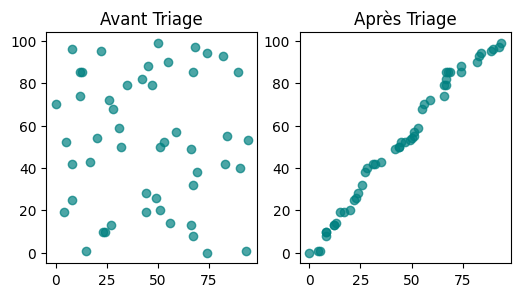

In [9]:
x = np.random.randint(0, 100, size = 50)
y = np.random.randint(0, 100, size = 50)
x_sorted = np.sort(x)
y_sorted = np.sort(y)


fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(x, y, color = 'teal', alpha = 0.7)
axes[0].set_title("Avant Triage")
axes[1].scatter(x_sorted, y_sorted, color = 'teal', alpha = 0.7)
axes[1].set_title("Après Triage")
plt.show()

Partionnement

**np.partition** divise le tableau en deux parties : Les $k$ plus petites valeurs (ou les plus grandes en utilisant des indices négatifs).

Cette méthode est plus rapide qu’un tri global si seules quelques valeurs extrêmes sont nécessaires.

In [10]:
import numpy as np

notes = np.array([92, 18, 83, 11, 48, 57, 49, 70,  9, 52, 24, 65, 72, 52, 60])
print(notes)
notes_p = np.partition(notes, 4)
notes_p

#### p[4] est 48 ; tous les éléments de p[:4] sont inférieurs ou égaux à p[4],
# et tous les éléments de p[5 :] sont supérieurs ou égaux à p[4]. 
# La partition est la suivante : [9, 11, 24, 18], [48], [52, 49, 52, 57, 60, 65, 70, 72, 83, 92]

[92 18 83 11 48 57 49 70  9 52 24 65 72 52 60]


array([ 9, 11, 24, 18, 48, 52, 49, 52, 57, 60, 65, 70, 72, 83, 92])

Exercise

Générer un tableau 10x10 d'échantillons aléatoires à partir d'une distribution uniforme, le trier et afficher le tableau original et le tableau trié côte à côte à l'aide de imshow().

##### Linear algebra (numpy.linalg)

Les fonctions d'algèbre linéaire de NumPy fournissent des implémentations efficaces de bas niveau des algorithmes d'algèbre linéaire standard.

Un vecteur est une entité mathématique définie dans un espace ayant une direction et une magnitude. Par exemple, dans un espace à 2 dimensions, un vecteur peut être représenté comme $$v = [v_1, v_2]$$

Une matrice est une disposition rectangulaire de nombres, souvent utilisée pour représenter des transformations linéaires ou des systèmes d'équations linéaires. Par exemple, une matrice 
𝐴 peut être définie comme :

\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}
\end{bmatrix}

Le **produit scalaire** entre deux vecteurs 
$a$ et $b$ est une somme des produits des éléments correspondants :


$$a \cdot b = \sum_{i=1}^{n} a_i \cdot b_i$$

Le **produit extérieur** crée une matrice ou chaque élément $M_{ij}$ est le produit de $a_i$ et $b_j$. Formellement:

$$M_{ij} = a_i \cdot b_j \\ 

a = [1, 2, 3], \, b = [4, 5, 6]
 \\ 
 
 \text{outer}(a, b) =
\begin{bmatrix}
1 \cdot 4 & 1 \cdot 5 & 1 \cdot 6 \\
2 \cdot 4 & 2 \cdot 5 & 2 \cdot 6 \\
3 \cdot 4 & 3 \cdot 5 & 3 \cdot 6
\end{bmatrix}
=
\begin{bmatrix}
4 & 5 & 6 \\
8 & 10 & 12 \\
12 & 15 & 18
\end{bmatrix}
$$


In [11]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

#### produit scalaire simple
resultat = np.dot(a, b)
print("Produit scalaire de deux vecteurs a et b :", resultat)

#### vdot est similaire à dot, mais il prend le conjugué complexe des éléments si nécessaire (utile pour les nombres complexes).
resultat = np.vdot(a, b)
print("Produit scalaire avec vdot :", resultat)

#### inner calcule la somme des produits des éléments correspondants de deux tableaux
resultat = np.inner(a, b)
print("Produit intérieur :", resultat)

#### Exemple : produit extérieur
resultat = np.outer(a, b)
print("Produit extérieur :", resultat)

Produit scalaire de deux vecteurs a et b : 32
Produit scalaire avec vdot : 32
Produit intérieur : 32
Produit extérieur : [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


Produit Scalaire de plusieurs matrices

In [12]:
#### Exemple : produit scalaire de plusieurs matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 10], [11, 12]])

resultat = np.linalg.multi_dot([A, B, C])
print("Produit scalaire multiple (multi_dot) :", resultat)

Produit scalaire multiple (multi_dot) : [[ 413  454]
 [ 937 1030]]


Décompositions 

Les décompositions matricielles sont des outils puissants en algèbre linéaire qui permettent de factoriser une matrice en plusieurs matrices plus simples. Les décompositions sont couramment utilisées dans des problèmes d'optimisation où il faut manipuler des matrices définies positives.

Exemple : Cholesky 
Si $A$ est une matrice définie positive et symétrique, elle peut etre factorisée en : $$A = L \cdot L^T$$ où 
L est une matrice triangulaire inférieure (ou U, triangulaire supérieure).


In [13]:
A = np.array([[4, 2, 2],
              [2, 3, 1],
              [2, 1, 3]])

#### Décomposition de Cholesky
L = np.linalg.cholesky(A)

#### Vérification : Reconstituer la matrice d'origine
A_reconstructed = np.dot(L, L.T)

#### Affichage des résultats
print("Matrice originale A :\n", A)
print("Matrice triangulaire inférieure L :\n", L)
print("Reconstruction de A avec L * L^T :\n", A_reconstructed)

Matrice originale A :
 [[4 2 2]
 [2 3 1]
 [2 1 3]]
Matrice triangulaire inférieure L :
 [[2.         0.         0.        ]
 [1.         1.41421356 0.        ]
 [1.         0.         1.41421356]]
Reconstruction de A avec L * L^T :
 [[4. 2. 2.]
 [2. 3. 1.]
 [2. 1. 3.]]


Eigenvalues & Eigenvectors (Valeurs Propres et Vecteurs Propes)

Les valeurs propres et vecteurs propres sont des concepts en algèbre linéaire qui te permettent de comprendre comment une matrice agit sur un vecteur et simplifient de nombreux calculs matriciels.  En science des données, ils sont surtout populaires pour la réduction de la dimensionnalité, en particulier dans **l'Analyse en Composantes Principales (ACP)** pour identifier les axes les plus significatifs dans les données.

Le vecteur qui ne change que d'un facteur scalaire après l'application d'une transformation est appelé vecteur propre, et la valeur scalaire attachée au vecteur propre est appelée valeur propre.

In [14]:
A = np.array([
    [4, 2],
    [1, 3]
])

#### Calculer les valeurs propres et vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(A)

#### Afficher les résultats
print("Matrice A :\n", A)
print("Valeurs propres :\n", eigenvalues)
print("Vecteurs propres :\n", eigenvectors)

#### Vérification : A * v = λ * v pour chaque valeur propre/vecteur propre
for i in range(len(eigenvalues)):
    lambda_v = eigenvalues[i] * eigenvectors[:, i]
    A_v = np.dot(A, eigenvectors[:, i])
    print(f"\nVérification pour λ_{i+1} :")
    print("A * v : ", A_v)
    print("λ * v : ", lambda_v)


Matrice A :
 [[4 2]
 [1 3]]
Valeurs propres :
 [5. 2.]
Vecteurs propres :
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]

Vérification pour λ_1 :
A * v :  [4.47213595 2.23606798]
λ * v :  [4.47213595 2.23606798]

Vérification pour λ_2 :
A * v :  [-1.41421356  1.41421356]
λ * v :  [-1.41421356  1.41421356]


Norme : La norme mesure la taille ou la longueur d'un vecteur ou d'une matrice. Elles sont cruciales pour quantifier la distance entre points, vecteurs ou prédictions dans les espaces de caractéristiques.

$$\|v\|_2 = \sqrt{\sum_{i=1}^n v_i^2},  \\ \quad \|v\|_1 = \sum_{i=1}^n |v_i|$$


In [15]:
v = np.array([3, 4, 12, 5, 1])

l2_norm = np.linalg.norm(v, ord = 2)  ### Norme Euclidienne (L^2)
l1_norm = np.linalg.norm(v, ord = 1)  ### Norme L^1

print("Norme L2 du vecteur :", l2_norm)
print("Norme L1 du vecteur :", l1_norm)

Norme L2 du vecteur : 13.96424004376894
Norme L1 du vecteur : 25.0


Nombre de condition -
Le nombre de condition d’une matrice $A$ mesure sa sensibilité aux perturbations. Il est défini comme :

$$ \kappa(A) = \|A\| \cdot \|A^{-1}\|$$

Un grand nombre de condition indique que la matrice est proche d'être singulière (non inversible). Si une matrice est mal conditionnée dans une régression linéaire, cela peut entraîner des prédictions très instables.

En règle générale, si le nombre de condition $\kappa(A) = 10^k$, alors vous pouvey perdre jusqu'à $k$ chiffres de précision en plus de ce qui serait perdu pour la méthode numérique en soi.

In [16]:
a = np.array([[1, 2, 7], [3, 4, 2]])
condition_number = np.linalg.cond(a)
print("Nombre de condition de la matrice :", condition_number)

Nombre de condition de la matrice : 2.2640329956927707


Determinant - 
Le déterminant fournit des informations importantes sur une matrice, telles que :

1) Inversibilité : Si le déterminant est 0 la matrice n'est pas inversible.
2) Volume : Il indique comment la matrice transforme les volumes dans un espace géométrique.
3) Dépendance linéaire : Un déterminant nul indique que les lignes ou colonnes de la matrice sont linéairement dépendantes.

$$\text{det}(A) = \sum_{\text{permutations}} \text{produits} - \text{produits opposés}$$

En PCA, le déterminant de la matrice de covariance aide à comprendre la "diversité" des données dans un espace.

In [17]:
a = np.array([[1, 2], [3, 4]])
determinant = np.linalg.det(a)
print("Déterminant de la matrice :", determinant)

Déterminant de la matrice : -2.0000000000000004


La trace d'une matrice carrée $A$ est la somme des éléments sur sa diagonale principale :

$$ \text{trace}(A) = \sum_{i=1}^n A_{ii}$$

En machine learning, elle est utilisée dans les calculs des gradients pour optimiser des modèles.

In [18]:
a = np.array([[1, 2], [3, 4]])
trace = np.trace(a)
print("Trace de la matrice :", trace)

Trace de la matrice : 5


##### Discrete Fourier Transform (numpy.fft)

L'analyse de Fourier est fondamentalement une méthode permettant d'exprimer une fonction comme une somme de composantes périodiques et de récupérer la fonction à partir de ces composantes. Lorsque la fonction et sa transformée de Fourier sont remplacées par des contreparties discrétisées, on parle de transformée de Fourier discrète (DFT).

Il existe de nombreuses façons de définir la TFD, mais dans Numpy, on utilise ce qui suit: 

$$ A_k = \sum_{m=0}^{n-1} a_m \exp\left(-2\pi i \frac{mk}{n}\right), \quad k = 0, \ldots, n-1.$$

Elle est largement utilisée dans le traitement des signaux, l'analyse d'images et le traitement audio. Elle permet d'analyser le contenu fréquentiel d'un signal, ce qui la rend utile dans de nombreuses applications, notamment le filtrage, la compression de signaux et l'analyse spectrale.

In [19]:
### Define an array of sample data (signal)
signal = np.array([12, 22, 3, 14])

### Compute the Discrete Fourier Transform of the signal
dft_signal = np.fft.fft(signal)

print("DFT of the signal:", dft_signal)

### Compute the Inverse Discrete Fourier Transform of the DFT
reconstructed_signal = np.fft.ifft(dft_signal)

print("Reconstructed signal:", reconstructed_signal)

DFT of the signal: [ 51.+0.j   9.-8.j -21.+0.j   9.+8.j]
Reconstructed signal: [12.+0.j 22.+0.j  3.+0.j 14.+0.j]


Exercise

Générez un signal réel avec le code ci-dessous, appliquez-lui la transformée discrète de Fourier (DFT) et après reconstruire le signal. En utilisant matplotlib (plt.plot()), visualisez le signal original et le signal reconstruit côte à côte.

***
fs = 100 

t = np.linspace(0, 1, fs, endpoint=False)  

freq = 5 

signal = np.sin(2 * np.pi * freq * t) + 0.5 * np.random.normal(size=fs)  #### Sine wave + noise

***

##### Structured Arrays (Tableaux Structurés)

Les tableaux structurés sont des ndarrays dont le type de données est une composition de types de données plus simples organisés comme une séquence de champs nommés. Donc des données hétérogènes, c'est-à-dire des ensembles où les colonnes peuvent contenir des types de données différents (entiers, flottants, chaînes, etc.) (similaire au Pandas)

In [20]:
### Définir un type de données structuré
notre_dtype = [('Nom', 'U10'), ('Âge', 'i4'), ('Taille', 'f4')]

### Créer un tableau structuré
data = np.array([('Alice', 25, 1.68), ('Bob', 30, 1.75), ('Charlie', 28, 1.80)], dtype = notre_dtype)

print(data)

[('Alice', 25, 1.68) ('Bob', 30, 1.75) ('Charlie', 28, 1.8 )]


Les tableaux structurés facilitent l’import/export de données avec des fichiers binaires, CSV ou des bases de données SQL.

Nous pouvons également utiliser des dictionnaires pour initialiser les types de tableaux structurés.

In [21]:
dtype_dict = {
    'Nom': 'U10',
    'Âge': 'i4',   
    'Taille': 'f4' 
}

### Convertir le dictionnaire en liste de tuples pour dtype
notre_dtype = [(key, value) for key, value in dtype_dict.items()]

data = np.array([('Alice', 25, 1.68), ('Bob', 30, 1.75), ('Charlie', 28, 1.80)], dtype = notre_dtype)
data

array([('Alice', 25, 1.68), ('Bob', 30, 1.75), ('Charlie', 28, 1.8 )],
      dtype=[('Nom', '<U10'), ('Âge', '<i4'), ('Taille', '<f4')])

Indexation

In [22]:
print(data)

### Accéder à une colonne entière
print("\nColonne: {}".format(data['Nom']))

### Accéder à une ligne entière
print("Ligne: {}".format(data[1]))

### Champs specifiques
print(data[1]['Nom'])
print(data[1][0])

print("\nSlicing: {}".format(data[1:2]))

### Filtrage
print(data[data['Âge'] > 25])
print(data[data['Taille'] > 1.76])

print("\nTriage")
### Trier les données par âge
sorted_data = np.sort(data, order='Âge')
print(sorted_data)

### Trier par plusieurs champs (par Âge puis par Taille)
sorted_data = np.sort(data, order=['Taille', 'Âge'])
print(sorted_data)

[('Alice', 25, 1.68) ('Bob', 30, 1.75) ('Charlie', 28, 1.8 )]

Colonne: ['Alice' 'Bob' 'Charlie']
Ligne: ('Bob', 30, 1.75)
Bob
Bob

Slicing: [('Bob', 30, 1.75)]
[('Bob', 30, 1.75) ('Charlie', 28, 1.8 )]
[('Charlie', 28, 1.8)]

Triage
[('Alice', 25, 1.68) ('Charlie', 28, 1.8 ) ('Bob', 30, 1.75)]
[('Alice', 25, 1.68) ('Bob', 30, 1.75) ('Charlie', 28, 1.8 )]


Manipulation

In [23]:
### Mettre à jour un champ dans une ligne
data[1]['Taille'] = 1.80
print(data)
#### Mettre à jour plusieurs lignes en une seule opération
data['Âge'][data['Âge'] > 28] = 29
print(data)

### Calculer la moyenne d'âge
mean_age = np.mean(data['Âge'])
print("Âge moyen :", mean_age)

### Trouver la taille maximale
max_taille = np.max(data['Taille'])
print("Taille maximale :", max_taille)

[('Alice', 25, 1.68) ('Bob', 30, 1.8 ) ('Charlie', 28, 1.8 )]
[('Alice', 25, 1.68) ('Bob', 29, 1.8 ) ('Charlie', 28, 1.8 )]
Âge moyen : 27.333333333333332
Taille maximale : 1.8


Bien que NumPy ne permette pas d'ajouter directement un champ à un tableau structuré, vous pouvez recréer un tableau structuré avec un champ supplémentaire.

In [24]:
new_dtype = data.dtype.descr + [('Poids', 'f4')]
data_with_weight = np.zeros(data.shape, dtype = new_dtype)
for name in data.dtype.names:
    data_with_weight[name] = data[name]
data_with_weight['Poids'] = [65.0, 75.0, 80.0]

print(data_with_weight)

[('Alice', 25, 1.68, 65.) ('Bob', 29, 1.8 , 75.)
 ('Charlie', 28, 1.8 , 80.)]


Visualization

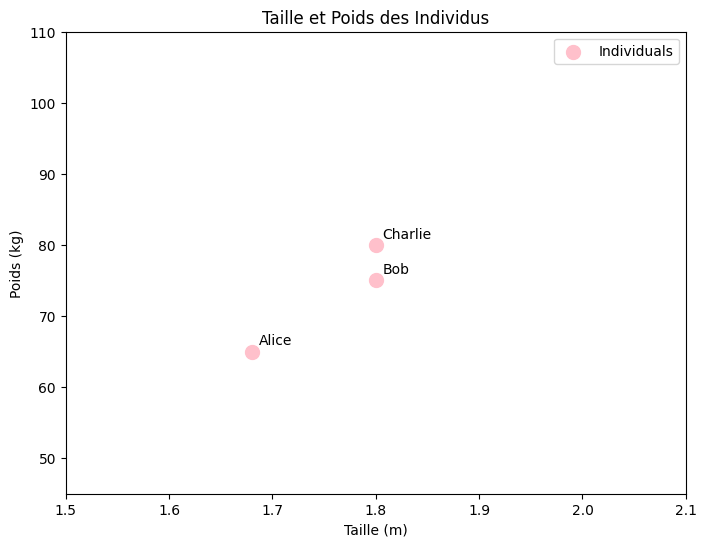

In [25]:
heights = data_with_weight['Taille']
weights = data_with_weight['Poids']
names = data_with_weight['Nom']

plt.figure(figsize=(8, 6))
plt.scatter(heights, weights, color='pink', s=100, label='Individuals')

### Annotation pour chaque point
for i, name in enumerate(names):
    plt.annotate(name, (heights[i], weights[i]), textcoords="offset points", xytext=(5, 5))

### Customization
plt.title("Taille et Poids des Individus")
plt.xlabel("Taille (m)")
plt.ylabel("Poids (kg)")
plt.xlim(1.50, 2.10)
plt.ylim(45, 110)
plt.legend()

plt.show()

Exercise

En suivant l'exemple ci-dessus, créez un tableau structuré contenant des 5 voitures et les propriétés suivantes : Marque, Année de production et Prix.
Visualisez-les dans un nuage de points matplotlib en fonction de l'année de production et du prix, en annotant avec le nom de la marque.

##### Python **statistics** module

Python dispose d'un module intégré que vous pouvez utiliser pour calculer des statistiques mathématiques à partir de données numériques.
Le module de statistiques était nouveau dans Python 3.4.

In [26]:
import random
import statistics

random.seed(22)  #### Set seed for reproducibility
n = 200
arr = [random.randint(1, 100) for _ in range(n)]
print(len(arr))

print("Moyenne:")
print("statistics.mean :", statistics.mean(arr))
print()

print("Geometric Mean:", statistics.geometric_mean(arr))
print()

print("Mode:", statistics.mode(arr))
print()

print("Median:")
print("statistics.median :", statistics.median(arr))
print()

print("Variance:")
print("statistics.variance :", statistics.variance(arr))
print()

print("écart-type:")
print("statistics.stdev :", statistics.stdev(arr))
print()

print("Minimum:")
print("min :", min(arr))
print()

print("Maximum:")
print("max :", max(arr))
print()


200
Moyenne:
statistics.mean : 48.52

Geometric Mean: 36.27923857695716

Mode: 24

Median:
statistics.median : 47.0

Variance:
statistics.variance : 846.652864321608

écart-type:
statistics.stdev : 29.097299948991967

Minimum:
min : 1

Maximum:
max : 100



##### Calculs Accélérés avec JAX

Dans le domaine de l’analyse de données et du calcul scientifique, gérer efficacement des tableaux structurés et tirer parti de la puissance des GPU est essentiel pour optimiser les performances. JAX, une bibliothèque Python moderne, se distingue en combinant les capacités de manipulation de tableaux de NumPy avec des fonctionnalités avancées comme la vectorisation automatique, la différenciation automatique et l'exécution accélérée sur GPU.

In [32]:
#### Benchmark JAX et Numpy

import jax.numpy as jnp
import time

### Dimensions des matrices
size = 1000

### Création des matrices aléatoires
matrix_a_np = np.random.rand(size, size)
matrix_b_np = np.random.rand(size, size)

matrix_a_jax = jnp.array(matrix_a_np)
matrix_b_jax = jnp.array(matrix_b_np)

#### Fonction de multiplication avec mesure de temps
def measure_time(func, *args, library_name=""):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    print(f"Temps ({library_name}): {end_time - start_time:.4f} secondes")
    return result

### Multiplication avec NumPy
result_np = measure_time(np.dot, matrix_a_np, matrix_b_np, library_name="NumPy")

### Multiplication avec JAX
result_jax = measure_time(jnp.dot, matrix_a_jax, matrix_b_jax, library_name="JAX")


print(np.mean(result_np))
print(np.mean(result_jax))

Temps (NumPy): 0.0111 secondes
Temps (JAX): 0.0082 secondes
249.8490171417288
249.84898
